In [4]:
# round trip NDBC code
import os
import pickle
from datetime import datetime, timezone
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors
import numpy as np

import xarray as xr
import xroms
import matplotlib.pyplot as plt
from wavespectra import read_ww3, read_swan, read_ndbc, read_netcdf
#from roguewave.wavespectra.estimators.estimate import estimate_directional_distribution
#%run -i roguewave_estimators.py
os.chdir('/vortexfs1/home/csherwood/src/NOPP_Utilities')
print(os.getcwd())
%run -i wave_stats.py

/vortexfs1/home/csherwood/src/NOPP_Utilities


In [15]:
# These are the GOM buoys with data for Ian
buoys = ['42039','42098', '42099']
# pick one for testing
buoy = buoys[0]

stime = datetime.strptime('2022-09-26', '%Y-%m-%d')
etime = datetime.strptime('2022-10-01', '%Y-%m-%d')

url ='https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/' + str(buoy) + '/' + str(buoy) + 'w9999' + '.nc'
print(url)
# use wavespectra routine for reading & generating 2dspec
dso = read_ndbc(url, dd=10.0, chunks={}).sel(time=slice(stime, etime))
dso

https://dods.ndbc.noaa.gov/thredds/dodsC/data/swden/42039/42039w9999.nc


<xarray.Dataset>
Dimensions:  (time: 118, freq: 46, lat: 1, lon: 1, dir: 36)
Coordinates:
  * time     (time) datetime64[ns] 2022-09-26T00:50:00 ... 2022-09-30T23:50:00
  * freq     (freq) float32 0.033 0.038 0.043 0.048 ... 0.425 0.445 0.465 0.485
  * lat      (lat) float32 28.79
  * lon      (lon) float32 -86.01
  * dir      (dir) float64 0.0 10.0 20.0 30.0 40.0 ... 320.0 330.0 340.0 350.0
Data variables:
    efth     (time, lat, lon, freq, dir) float64 dask.array<chunksize=(118, 1, 1, 46, 36), meta=np.ndarray>

In [14]:
ds = dso.isel(lat=0, lon=0, time=18)
ds
efth = ds.efth.values
dirs = ds.dir.values
freqs = ds.freq.values

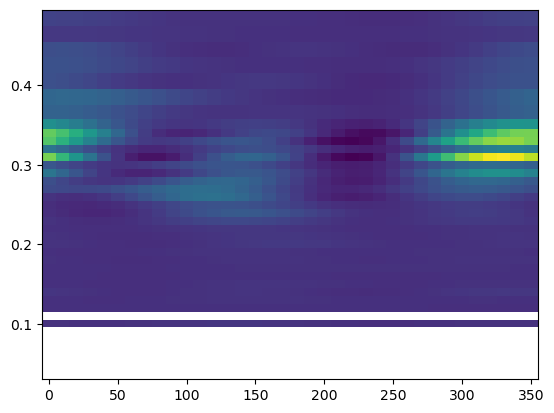

In [16]:
plt.pcolormesh(dirs, freqs, efth)